# Partie sur la prediction des données

## Prédiction des scores des elections du second tour 2022

### Bibliotheque

In [39]:
import pandas as pd
import numpy as np
import random
import os
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

### Préparation des données

In [2]:
# Sélection des features
df_concat = pd.read_excel('Commune.xlsx')

features = df_concat.drop(['Abstentions','Macron', 'Lepen', 'COM'], axis=1)

ScoreMacron =  df_concat['Macron'].values.reshape(-1, 1)

ScoreLepen =  df_concat['Lepen'].values.reshape(-1, 1)

ScoreAbstentions =  df_concat['Abstentions'].values.reshape(-1, 1)


# Normalisation des données
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(features)

scalerMacron = StandardScaler()
ScoreMacron = scalerMacron.fit_transform(ScoreMacron)

scalerLepen = StandardScaler()
ScoreLepen = scalerLepen.fit_transform(ScoreLepen)

scalerAbstentions = StandardScaler()
ScoreAbstentions = scalerAbstentions.fit_transform(ScoreAbstentions)


###  Selection des Colonnes intéressante

In [16]:
def Selection_Colonne_Pvalue(label):
    # Création de l'analyse pour la p_value
    p_values = {}
    for i, column in enumerate(features.columns):
        p_value = pearsonr(X_scaled[:, i], label.flatten())[1]
        p_values[i] = p_value

    # Sélectionnez les colonnes avec des p-values inférieures au seuil de significativité
    significant_indices = [column for column, p_value in p_values.items() if p_value < 0.05]
    #print("Affichage des colonnes selectionné : ",features.iloc[:, significant_indices].columns)
    return X_scaled[:, significant_indices]

X_Macron = Selection_Colonne_Pvalue(ScoreMacron)
X_Lepen = Selection_Colonne_Pvalue(ScoreLepen)
X_Abstentions = Selection_Colonne_Pvalue(ScoreAbstentions)

#division des données
split_index1 = int(df_concat.shape[0] * 0.8)
split_index2 = int(df_concat.shape[0] * 0.9)

X_train_Marcon, X_val_Marcon, X_test_Marcon = X_Macron[:split_index1, :], X_Macron[split_index1:split_index2, :], X_Macron[split_index2:, :]
y_train_Marcon, y_val_Marcon, y_test_Marcon = ScoreMacron[:split_index1], ScoreMacron[split_index1:split_index2], ScoreMacron[split_index2:]

X_train_Lepen, X_val_Lepen, X_test_Lepen = X_Lepen[:split_index1, :], X_Lepen[split_index1:split_index2, :], X_Lepen[split_index2:, :]
y_train_Lepen, y_val_Lepen, y_test_Lepen = ScoreLepen[:split_index1], ScoreLepen[split_index1:split_index2], ScoreLepen[split_index2:]

X_train_Abstentions, X_val_Abstentions, X_test_Abstentions = X_Abstentions[:split_index1, :], X_Abstentions[split_index1:split_index2, :], X_Abstentions[split_index2:, :]
y_train_Abstentions, y_val_Abstentions, y_test_Abstentions = ScoreAbstentions[:split_index1], ScoreAbstentions[split_index1:split_index2], ScoreAbstentions[split_index2:]


### Application de Regression

Macron

In [74]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train_Marcon, y_train_Marcon)

predictions_logistic = linear_reg.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.2187667670858043
P-value associée : 2.7297271543088305e-35
R-value : -0.36497912749999695


In [63]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor() 
sgd_regressor.fit(X_train_Marcon, y_train_Marcon)


predictions_sgd = sgd_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.2187667670858043
P-value associée : 2.7297271543088305e-35
R-value : -0.36497912749999695


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(X_train_Marcon, y_train_Marcon)

predictions_ridge = ridge_regressor.predict(X_test_Marcon)
correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.2187667670858043
P-value associée : 2.7297271543088305e-35
R-value : -0.36497912749999695


Lepen

In [75]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_Lepen, y_train_Lepen)

predictions_logistic = linear_reg.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : -0.21561653831605776
P-value associée : 2.6284376051516983e-34
R-value : -1.118259427851711


In [72]:
sgd_regressor = SGDRegressor() 
sgd_regressor.fit(X_train_Lepen, y_train_Lepen)


predictions_sgd = sgd_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : -0.21561653831605776
P-value associée : 2.6284376051516983e-34
R-value : -1.118259427851711


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train_Lepen, y_train_Lepen)

predictions_ridge = ridge_regressor.predict(X_test_Lepen)
correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : -0.21561653831605776
P-value associée : 2.6284376051516983e-34
R-value : -1.118259427851711


Abstention

In [76]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_Abstentions, y_train_Abstentions)

predictions_logistic = linear_reg.predict(X_test_Abstentions)
correlation, p_value = pearsonr(y_test_Abstentions.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : 0.8163260284392874


In [70]:
sgd_regressor = SGDRegressor() 
sgd_regressor.fit(X_train_Abstentions, y_train_Abstentions)


predictions_sgd = sgd_regressor.predict(X_test_Abstentions)
correlation, p_value = pearsonr(y_test_Abstentions.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : 0.8163260284392874


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train_Abstentions, y_train_Abstentions)

predictions_ridge = ridge_regressor.predict(X_test_Abstentions)
correlation, p_value = pearsonr(y_test_Abstentions.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : 0.8163260284392874


### Foret Aleatoire

In [50]:
from sklearn.ensemble import RandomForestRegressor

#Macron
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

predictions_rf = rf_regressor.predict(X_test_Marcon)

correlation, p_value = pearsonr(y_test_Marcon.ravel(), predictions_rf)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))


Corrélation entre les valeurs réelles et prédites : 0.9542419488893842
P-value associée : 0.0
R-value : 0.9104793669639482


In [51]:
#Lepen
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

predictions_rf = rf_regressor.predict(X_test_Lepen)

correlation, p_value = pearsonr(y_test_Lepen.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9539538058745585
P-value associée : 0.0
R-value : 0.9099048456201255


In [52]:
#Abstention
rf_regressor = RandomForestRegressor(n_estimators=100) 
rf_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

predictions_rf = rf_regressor.predict(X_test_Abstentions)

correlation, p_value = pearsonr(y_test_Abstentions.ravel(), predictions_rf)

print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : 0.8163260284392874


### SVM

Macron

In [55]:
from sklearn.svm import SVR

svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : -0.36497912749999695


In [56]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Marcon, y_train_Marcon.ravel())

y_pred_linear = svm_regressor.predict(X_test_Marcon)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Marcon.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : -0.36497912749999695


Lepen

In [57]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

Corrélation entre les valeurs réelles et prédites : 0.9063074117591151
P-value associée : 0.0
R-value : -1.118259427851711


In [58]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Lepen, y_train_Lepen.ravel())

y_pred_linear = svm_regressor.predict(X_test_Lepen)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Lepen.ravel(), predictions_rf))

KeyboardInterrupt: 

Abstentions

In [ ]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

y_pred_linear = svm_regressor.predict(X_test_Abstentions)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

In [ ]:
svm_regressor = SVR(kernel='poly')
svm_regressor.fit(X_train_Abstentions, y_train_Abstentions.ravel())

y_pred_linear = svm_regressor.predict(X_test_Abstentions)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test_Abstentions.ravel(), predictions_rf))

### Reseau de neuronne

In [27]:
#conversion pandas -> numpy

X_trainNN_Marcon = np.array(X_train_Marcon,dtype=float)
X_trainNN_Lepen = np.array(X_train_Lepen,dtype=float)
X_trainNN_Abstentions = np.array(X_train_Abstentions,dtype=float)

y_trainNN_Lepen = np.array(y_train_Lepen,dtype=float)
y_trainNN_Marcon = np.array(y_train_Marcon,dtype=float)
y_trainNN_Abstentions = np.array(y_train_Abstentions,dtype=float)

X_valNN_Marcon = np.array(X_val_Marcon,dtype=float)
X_valNN_Lepen = np.array(X_val_Lepen,dtype=float)
X_valNN_Abstentions = np.array(X_val_Abstentions,dtype=float)
y_valNN_Lepen = np.array(y_val_Lepen,dtype=float)
y_valNN_Marcon = np.array(y_val_Marcon,dtype=float)
y_valNN_Abstentions = np.array(y_val_Abstentions,dtype=float)

X_testNN_Marcon = np.array(X_test_Marcon,dtype=float)
X_testNN_Lepen = np.array(X_test_Lepen,dtype=float)
X_testNN_Abstentions = np.array(X_test_Abstentions,dtype=float)

y_testNN_Lepen = np.array(y_test_Lepen,dtype=float)
y_testNN_Marcon = np.array(y_test_Marcon,dtype=float)
y_testNN_Abstentions = np.array(y_test_Abstentions,dtype=float)

In [28]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np


CallBackSave = callbacks.ModelCheckpoint("best_model_Valeurs.keras", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=20)

"""class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 0.3:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbackStop = myCallback()"""

def createModel():
    #model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[features.shape[1]])])

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.Adam())
    return model

def affichagePrediction(prediction, reel):
    for i in range(len(prediction)):
        print("valeur prédite :", prediction[i], "valeur réelle :", reel[i], "écart :", np.abs(prediction[i] - reel[i]))

#### Entrainement pour Macron

In [29]:
model = createModel()
history = model.fit(X_trainNN_Marcon, y_trainNN_Marcon,
                    epochs=1000,validation_data=(X_valNN_Marcon, y_valNN_Marcon),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1823 - val_loss: 0.1054
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0982 - val_loss: 0.0940
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0939 - val_loss: 0.0938
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0923 - val_loss: 0.0916
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0909 - val_loss: 0.1035
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0979 - val_loss: 0.0922
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0941 - val_loss: 0.0982
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0890 - val_loss: 0.1080
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0864 - val_loss: 0.0952
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0811 - val_loss: 0.0951
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0712 - val_loss: 0.1049
Epoch 12/1000
784/784 ━━━━━━━━

In [42]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerMacron.inverse_transform(y_trainNN_Marcon[0].reshape(-1, 1)), "; valeur predite : ",scalerMacron.inverse_transform(best_model.predict(X_trainNN_Marcon[0:1]).reshape(-1, 1)))


y_pred_NN = best_model.predict(X_testNN_Marcon)

reel = scalerMacron.inverse_transform(y_testNN_Marcon)
prediction = scalerMacron.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pour Macron")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Marcon, y_testNN_Marcon)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Marcon),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)

print("R-value :", r2_score(np.squeeze(y_testNN_Marcon),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Sur les entrainement la valeur reel :  [[52.67]] ; valeur predite :  [[51.748802]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 2.0263
Perte de test : 2.1560041904449463
Corrélation entre les valeurs réelles et prédites : 0.9583504473724145
P-value associée : 0.0
R-value : 0.916806765834029


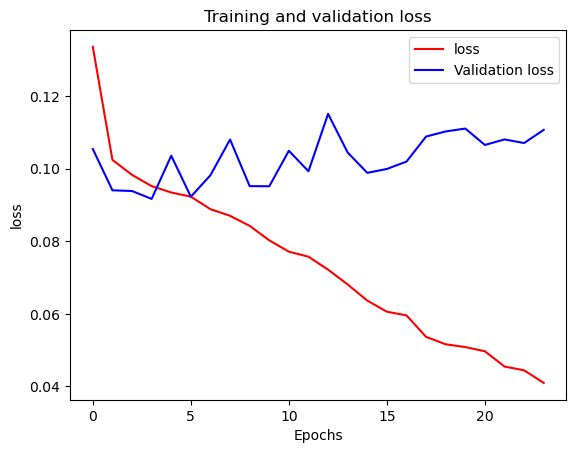

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour Lepen

In [45]:
model = createModel()
history = model.fit(X_trainNN_Lepen, y_trainNN_Lepen,
                    epochs=1000,validation_data=(X_valNN_Lepen, y_valNN_Lepen),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2157 - val_loss: 0.0980
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1053 - val_loss: 0.0958
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0972 - val_loss: 0.1066
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0976 - val_loss: 0.0986
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0904 - val_loss: 0.0949
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0925 - val_loss: 0.0956
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0932 - val_loss: 0.0929
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0903 - val_loss: 0.0942
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0855 - val_loss: 0.0984
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0838 - val_loss: 0.1048
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0758 - val_loss: 0.1020
Epoch 12/1000
784/784 ━━━━━━━━

In [46]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerLepen.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerLepen.inverse_transform(best_model.predict(X_trainNN_Lepen[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN_Lepen)

reel = scalerLepen.inverse_transform(y_testNN_Lepen)
prediction = scalerLepen.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pour Lepen")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Lepen, y_testNN_Lepen)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Lepen),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(np.squeeze(y_testNN_Lepen),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Sur les entrainement la valeur reel :  [[47.33]] ; valeur predite :  [[52.07709]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.1396
Perte de test : 0.11552849411964417
Corrélation entre les valeurs réelles et prédites : -0.9584712807656358
P-value associée : 0.0
R-value : -2.6060430497760168


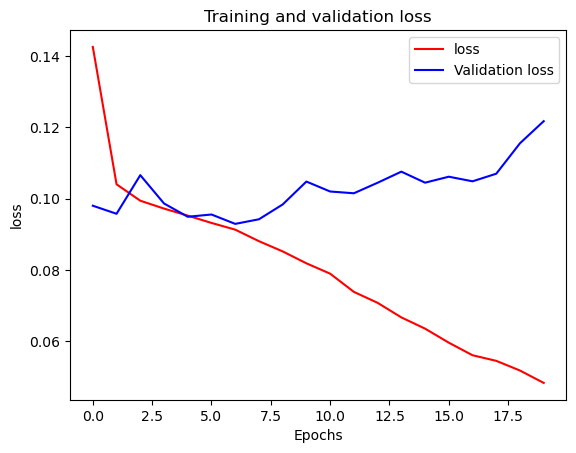

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour l'abstention

In [36]:
model = createModel()
history = model.fit(X_trainNN_Abstentions, y_trainNN_Abstentions,
                    epochs=1000,validation_data=(X_valNN_Abstentions, y_valNN_Abstentions),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3736 - val_loss: 0.2435
Epoch 2/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2275 - val_loss: 0.2445
Epoch 3/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2145 - val_loss: 0.2272
Epoch 4/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2160 - val_loss: 0.2263
Epoch 5/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2081 - val_loss: 0.2422
Epoch 6/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2036 - val_loss: 0.2396
Epoch 7/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1993 - val_loss: 0.2382
Epoch 8/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1949 - val_loss: 0.2291
Epoch 9/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1821 - val_loss: 0.2553
Epoch 10/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1826 - val_loss: 0.2460
Epoch 11/1000
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1679 - val_loss: 0.2396
Epoch 12/1000
784/784 ━━━━━━━━

In [44]:
best_model = tf.keras.models.load_model("best_model_Valeurs.keras")

print("Sur les entrainement la valeur reel : ", scalerAbstentions.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerAbstentions.inverse_transform(best_model.predict(X_trainNN_Abstentions[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN_Abstentions)

reel = scalerAbstentions.inverse_transform(y_testNN_Abstentions)
prediction = scalerAbstentions.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

#print("Affichage des predictions sur le test pourl' Abstentions")
#affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN_Abstentions, y_testNN_Abstentions)
print("Perte de test :", test_loss)

correlation, p_value = pearsonr(np.squeeze(y_testNN_Abstentions),  np.squeeze(y_pred_NN))

# Affichage de la corrélation et de la p-value
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)

print("R-value :", r2_score(np.squeeze(y_testNN_Abstentions),  np.squeeze(y_pred_NN)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Sur les entrainement la valeur reel :  [[19.93009084]] ; valeur predite :  [[22.43396]]
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.2839
Perte de test : 0.288349449634552
Corrélation entre les valeurs réelles et prédites : -0.36790147918863325
P-value associée : 4.119900423178409e-101
R-value : -0.7727030074447043


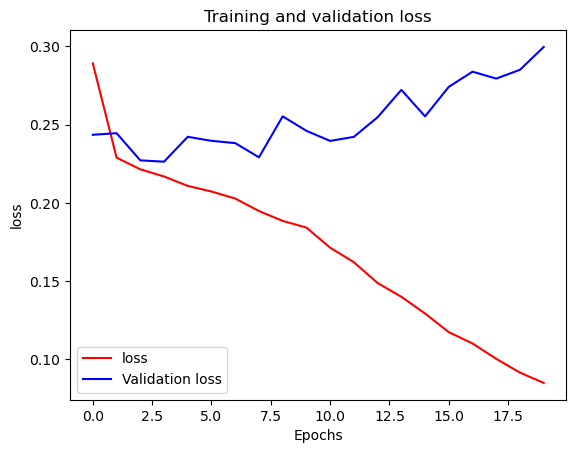

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()